# **GEOSTORY  PROJECT**

## _**ELECTROPUBLISHING AND DIGITAL STORYTELLING EXAM (DHDK MASTER DEGREE)**_

### **A project by Ariele Santello, Giulia Massimino, Benedetta Togni and Szilvia Baràth**

## **Step 0: Extract the bithplace of each artHistorian**

##**solo birthplace + citizenship (per ora) **


In [110]:
#Import the libraries
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib import URIRef 
from rdflib.namespace import RDF , RDFS
import SPARQLWrapper
from SPARQLWrapper import SPARQLWrapper, JSON
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# get the endpoint API
wikidata_endpoint = "https://query.wikidata.org/bigdata/namespace/wdq/sparql"
# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse a local RDF file by specifying the format into the graph
result = g.parse("artchives.nq", format='nquads')

#create a variable for the name spaces
wd = Namespace("http://www.wikidata.org/entity/") 
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


In [111]:
#create a set of all the URIs related to  arthistorians that are creators of a collection and that are entities in Wikidata 
arthistorians_list = set() 

for s,p,o in g.triples((None, wdt.P170, None)):
    if "www.wikidata.org/entity/" in str(o):
        arthistorians_list.add("<" +str(o) + ">")
        
print(arthistorians_list) 

#merging all the results in the variable arthistorians
arthistorians = ' '.join(arthistorians_list) 
print(arthistorians)


{'<http://www.wikidata.org/entity/Q1712683>', '<http://www.wikidata.org/entity/Q19997512>', '<http://www.wikidata.org/entity/Q995470>', '<http://www.wikidata.org/entity/Q88907>', '<http://www.wikidata.org/entity/Q18935222>', '<http://www.wikidata.org/entity/Q3057287>', '<http://www.wikidata.org/entity/Q1089074>', '<http://www.wikidata.org/entity/Q1629748>', '<http://www.wikidata.org/entity/Q2824734>', '<http://www.wikidata.org/entity/Q1271052>', '<http://www.wikidata.org/entity/Q457739>', '<http://www.wikidata.org/entity/Q1296486>', '<http://www.wikidata.org/entity/Q1641821>', '<http://www.wikidata.org/entity/Q537874>', '<http://www.wikidata.org/entity/Q1715096>', '<http://www.wikidata.org/entity/Q55453618>', '<http://www.wikidata.org/entity/Q1373290>', '<http://www.wikidata.org/entity/Q6700132>', '<http://www.wikidata.org/entity/Q85761254>', '<http://www.wikidata.org/entity/Q90407>', '<http://www.wikidata.org/entity/Q41616785>', '<http://www.wikidata.org/entity/Q3051533>', '<http://ww

In [112]:
#Select all the URIs and labels of arthistorians and their related birthplace(wdt:P19) 
birthplace_query = """
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
SELECT DISTINCT ?birthplace ?birthplace_label ?historian ?historian_label 
WHERE {
   VALUES ?historian {"""+arthistorians+"""} .  #include the variable in the query string
   ?historian rdfs:label ?historian_label .
   ?historian wdt:P19 ?birthplace .
   ?birthplace rdfs:label ?birthplace_label . 
   FILTER (langMatches(lang(?birthplace_label), "EN"))
   FILTER (langMatches(lang(?historian_label), "EN"))
   }
"""


# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()


In [190]:
#looking if there are URI and  label name in the graph, print the birthplace of the arthistorian and its related label
#print the label of arthistirian with the uri and the label of their birthplace 
# set the endpoint 
sparql_wd = SPARQLWrapper(wikidata_endpoint)
# set the query
sparql_wd.setQuery(birthplace_query)
# set the returned format
sparql_wd.setReturnFormat(JSON)
# get the results
results = sparql_wd.query().convert()
seen = set()
for result in results["results"]["bindings"]:
    historian_uri = result ["historian"]["value"]
    if "historian_label" in result:
        historian_label = result["historian_label"]["value"]
            #print(historian_label)
        if "birthplace" in result:
            birthplace = result["birthplace"]["value"]
        if "birthplace_label" in result:
            birthplace_label = result["birthplace_label"]["value"]
            print(historian_label, "was born in", birthplace_label)
                    #se ci stanno sia URI CHE LABEL DEL NOME nel grph
            #g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
            #g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        
    else:
        print("Empty dataset")
    g.add((URIRef(historian_uri) , URIRef(wdt.P19) , URIRef(birthplace) ))
    g.add((URIRef(birthplace) , RDFS.label , Literal(birthplace_label) ))
        

 
#new 'nq' file, where the property wdt:p19 is contained. This property is missing in artchives.nq
g.serialize(destination= 'artchives3_birthplaces.nq', format='nquads') 


Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Leo Steinberg was born in Moscow
Leo Steinberg was born in Moscow
Leo Steinberg was born in Moscow
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
John Pope-Hennessy was born in London
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Ernst Kitzinger was born in Munich
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Kurt Badt was born in Berlin
Luigi Salerno was born in Rome
Eugenio Battisti was born in Turin
Aby Warburg was born in Hamburg
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Werner Cohn was born in Berlin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio Battisti was born in Turin
Eugenio 

In [191]:
#put the data in a tabular format (csv) and clean data
import csv
import pandas as pd
import pandas_profiling as pp
import rdflib
import csv
 

# create an empty Graph
g = rdflib.ConjunctiveGraph()

# parse the file created before 
result = g.parse("artchives3_birthplaces.nq", format='nquads')  

 
#Select the label of arthistorians and the label of their birthplaces 
qres = g.query(
  """PREFIX wdt: <http://www.wikidata.org/prop/direct/>
  SELECT DISTINCT  ?historian_label ?birthplace_label
  WHERE { 
     ?historian wdt:P19 ?birthplace ;
     rdfs:label ?historian_label.
     ?birthplace rdfs:label ?birthplace_label .
     }
    """)

#create a new file from the parsed query

with open('FG_test_birth.csv', 'wt', encoding="utf8") as out_file:
    csv_writer = csv.writer(out_file, delimiter=';')
    csv_writer.writerow(['Historian', 'Birthplace'])
    for row in qres:
        csv_writer.writerow([row.historian_label.strip(), row.birthplace_label.strip()])




In [192]:
import csv
import pandas as pd
import pandas_profiling as pp


df = pd.read_table("FG_test_birth.csv", delimiter =";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')

print(df.head(30))




              Historian   Birthplace
0    John Pope-Hennessy       London
1    John Pope-Hennessy       London
2    John Pope-Hennessy       London
3    John Pope-Hennessy       London
4    John Pope-Hennessy       London
5    John Pope-Hennessy       London
6       Kornél Fabriczy       Levoča
7        Julius S. Held      Mosbach
8        Julius S. Held      Mosbach
9       Ernst Steinmann  Jördenstorf
10      Ernst Steinmann  Jördenstorf
11      Ernst Steinmann  Jördenstorf
12      Ernst Steinmann  Jördenstorf
13      Ernst Steinmann  Jördenstorf
14      Ernst Steinmann  Jördenstorf
15          Werner Cohn       Berlin
16        Wolfgang Lotz    Heilbronn
17        Wolfgang Lotz    Heilbronn
18     Eugenio Battisti        Turin
19    Ulrich Middeldorf     Staßfurt
20    Ulrich Middeldorf     Staßfurt
21        Leo Steinberg       Moscow
22        Leo Steinberg       Moscow
23     Ellis Waterhouse        Epsom
24            Kurt Badt       Berlin
25  Richard Krautheimer        Fürth
2

In [193]:
import pandas as pd
file_name = "FG_test_birth.csv"
file_name_output = "birthplaces_without_dupes.csv"

df = pd.read_csv(file_name, sep=";", engine = "python", encoding = 'utf8')
df.columns = df.columns.str.replace(' ', '')


# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding="utf8")

In [213]:

df = pd.read_csv("birthplaces_without_dupes.csv", delimiter=';', encoding = "utf8")
df.columns = df.columns.str.replace(' ', '')
    #prova con writerow, o creare dataFrame con pandas 
df.drop_duplicates('Historian', keep= 'first')
df.drop_duplicates('Birthplace', keep= 'first')
#df.head(30)
#df =df.set_index("Birthplace")
#df = df.drop("Forl�", axis=0)
df = df.drop([13], axis=0)
df.head(30)

,Historian,Birthplace
0,John Pope-Hennessy,London
1,Kornél Fabriczy,Levoča
2,Julius S. Held,Mosbach
3,Ernst Steinmann,Jördenstorf
4,Werner Cohn,Berlin
5,Wolfgang Lotz,Heilbronn
6,Eugenio Battisti,Turin
7,Ulrich Middeldorf,Staßfurt
8,Leo Steinberg,Moscow
9,Ellis Waterhouse,Epsom


In [217]:
pp.ProfileReport(df.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(df.drop_duplicates('Birthplace', keep= 'last'))


Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

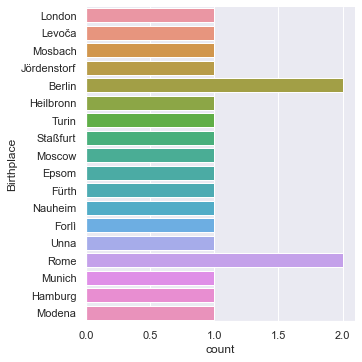

In [219]:

#plot the counting 
import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default theme
sns.set_theme()
my_graph = sns.catplot(y="Birthplace", kind= "count", data= df)

In [ ]:
#vanno bene questi due semplici count, i luoghi di nascita non hanno particolari correlazioni col resto

In [230]:
#CITIZENSHIP
import rdflib
from rdflib import Namespace , Literal , URIRef
from rdflib.namespace import RDF , RDFS
import csv

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')

unique_countries = set()
for s,p,o in g.triples(( None, wdt.P27, None)):   # wikidata = P27: citizenship
    for s1,p1,o1 in g.triples(( o, RDFS.label, None)):  
        unique_countries.add(o1.strip())
for country in unique_countries:
    print(country)
    
unique_historians = set()       #set di tutti gli arthistorian che sono creator di una collezione
for s,p,o in g.triples((None, wdt.P170, None)):
    for s1,p1,o1 in g.triples((o, RDFS.label, None)): #se metto s viene la lista delle collezioni
        unique_historians.add(o1.strip())
for historian in unique_historians:
    #print(historian)    
    
    query_result = g.query("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX wd: <http://www.wikidata.org/entity/> 
    SELECT DISTINCT (COUNT(?individual) AS ?ind) ?country ?name
    WHERE {
        VALUES ?class {<http://www.wikidata.org/entity/Q5>}
        VALUES ?property{<http://www.wikidata.org/prop/direct/P27>}
        ?individual rdf:type ?class ; 
                    ?property ?country .
        ?country rdfs:label ?name
    }
    GROUP BY ?name ?country
    """)

with open('citizenship_count.csv', 'wt') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Citizenship', 'Count'])
    for row in query_result:
        csv_writer.writerow([row.name.strip(), row.ind]) #se metto row.name mi da i nomi dei paesi, ma non leva i doppioni
        
import pandas as pd
data = pd.read_csv('citizenship_count.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

Germany
Hungary
England
Russia
Italy
United States of America


,Citizenship,Count
0,Germany,12
1,Germany,12
2,Germany,12
3,Italy,6
4,Germany,12
5,Italy,6
6,Italy,6
7,Germany,12
8,Italy,6
9,Germany,12


In [231]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Citizenship', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

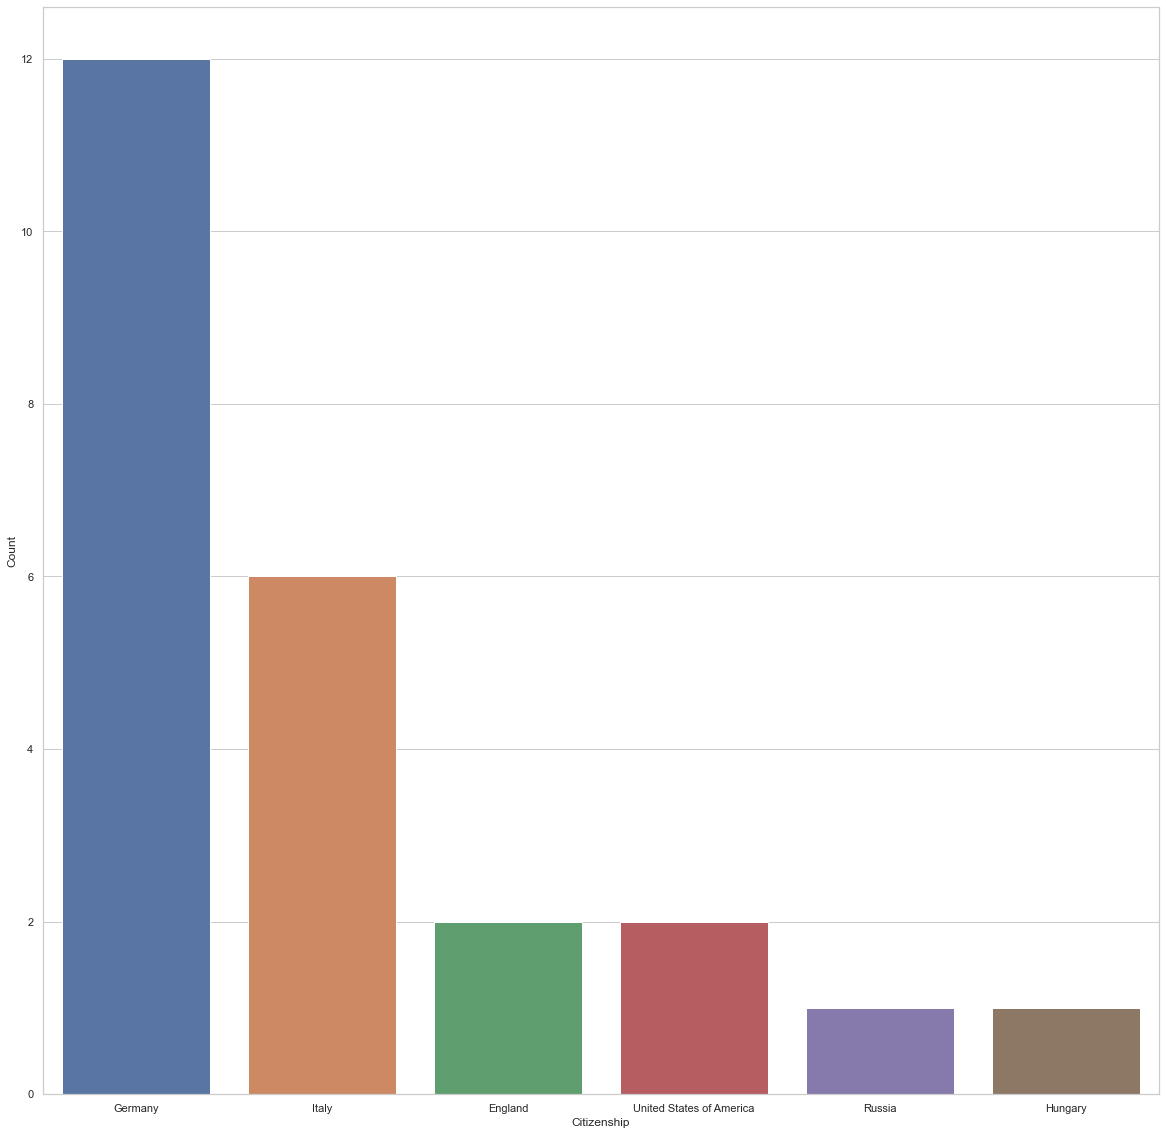

In [232]:
#my_graph = sns.catplot(y="Citizenship", kind = "count", data= df.drop_duplicates('Count', keep= 'last'))
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Citizenship", y="Count", data=data)

In [233]:
#TO VERIFY IF THE COUNT IS CORRECT

# bind the uncommon namespaces
wd = Namespace("http://www.wikidata.org/entity/") # remember that a prefix matches a URI until the last slash (or hashtag #)
wdt = Namespace("http://www.wikidata.org/prop/direct/")
art = Namespace("https://w3id.org/artchives/")


# create an empty Graph
g = rdflib.ConjunctiveGraph()
world_2 = dict()

# parse a local RDF file by specifying the format
result = g.parse("artchives.nq", format='nquads')    
    
query_result_2 = g.query("""
PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX wd: <http://www.wikidata.org/entity/> 
SELECT DISTINCT ?individual ?label ?country ?name 
WHERE {
    VALUES ?class {<http://www.wikidata.org/entity/Q5>}
    VALUES ?property{<http://www.wikidata.org/prop/direct/P27>}
    ?individual rdf:type ?class ;
                rdfs:label ?label;
                ?property ?country .
    ?country rdfs:label ?name .
}
GROUP BY ?individual ?label ?country ?name 
""")

for query_res in query_result_2:
    for query in query_res:
        world_2.update({str(query_res["name"]):str(query_res["label"])})
print(world_2)   #create a dictionary with the art historian and the given country of citizenship



{'               Germany': '            Ernst Steinmann', '                 Germany': '               Otto Lehmann-Brockhaus', ' Italy': '              Federico Zeri', 'Germany': 'Wolfgang Lotz', '             Germany': '         Ernst Kitzinger', '           United States of America': '                           Everett Fahy', '  Italy': 'Eugenio Battisti', '                    Germany': '               Otto Lehmann-Brockhaus', '     Germany': '         Ernst Kitzinger', '                      Italy': 'Stefano Tumidei', '                United States of America': 'Everett Fahy', '      Germany': '         Ernst Kitzinger', '         Germany': '         Ernst Kitzinger', '              England': 'Ellis Waterhouse', ' Germany': '       Richard Krautheimer', '  Germany': '             Ulrich Middeldorf', '                        Italy': 'Eugenio Battisti', '      Italy': 'Eugenio Battisti', '           Italy': 'Federico Zeri', '              Hungary': 'Kornél Fabriczy', '                

In [234]:
import csv
import rdflib

with open('dict_city.csv', 'w') as out_file:
    csv_writer = csv.writer(out_file, delimiter=',')
    csv_writer.writerow(['Country', 'Historian'])
    for row in query_result_2:
        csv_writer.writerow([row.name.strip(), row.label.strip(),])
        
        
import pandas as pd
data = pd.read_csv('dict_city.csv', encoding = 'Latin-1')
# print the first 5 rows
data.head(30)

,Country,Historian
0,Germany,Werner Cohn
1,Germany,Ulrich Middeldorf
2,Germany,Gustav Ludwig
3,Italy,Federico Zeri
4,Germany,Ulrich Middeldorf
5,Germany,Wolfgang Lotz
6,Germany,Fritz Heinemann
7,United States of America,Everett Fahy
8,Italy,Adolfo Venturi
9,Germany,Ulrich Middeldorf


In [235]:
import pandas_profiling as pp
pp.ProfileReport(data.drop_duplicates('Historian', keep= 'last'))
pp.ProfileReport(data.drop_duplicates('Country', keep= 'last'))

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [251]:
#clean the file dict_city, drop duplicates
import pandas as pd
file_name = "dict_city.csv"
file_name_output = "dict_city_without_dupes.csv"
dupes = set()
df = pd.read_csv(file_name, sep=";", engine = "python", encoding = "latin-1")
df.columns = df.columns.str.replace(' ', '')



# Notes:
# - the `subset=None` means that every column is used 
#    to determine if two rows are different; to change that specify
#    the columns as an array
# - the `inplace=True` means that the data structure is changed and
#   the duplicate rows are gone  
df.drop_duplicates(subset=None, inplace=True)

# Write the results to a different file
df.to_csv(file_name_output, index=False, sep=";", encoding = "utf8")

In [256]:
import csv
from collections import defaultdict
import numpy as np
data = {} # final data
#we create a matrice to plot our data  
with open('dict_city_without_dupes.csv') as csvfile:
    historians = [] 
    countries = []
    rows = csv.reader(csvfile, delimiter=',')
    next(rows) # skip the header
    for row in rows:
        if row[0] not in historians:
            historians.append(row[0]) # create the list of unique periods
        if row[1] not in countries:
            countries.append(row[1]) # create the list of unique periods
    print(historians)
    print(countries)
    countries.sort()
    histo_zeros_matrix = np.array(np.zeros(( len(countries), len(historians) ))) # rows, columns
    
    for i, histo in enumerate(historians): # loop over periods and their index position  
        for j, country in enumerate(countries):
            with open('dict_city_without_dupes.csv') as csvfile:
                rows = csv.reader(csvfile, delimiter=',')
                for row in rows:
                    if row[1] == country and row[0] == histo:
                        histo_zeros_matrix[j][i] = int(histo_zeros_matrix[j][i])+1
    
    histo_zeros_matrix
    
# put everything together
data["historians"] = historians
for i, country in enumerate(countries):
    data[country] = list(histo_zeros_matrix[i])
print(data) 

['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia']
['Werner Cohn', 'Ulrich Middeldorf', 'Gustav Ludwig', 'Federico Zeri', 'Wolfgang Lotz', 'Fritz Heinemann', 'Everett Fahy', 'Adolfo Venturi', 'Luigi Salerno', 'Ernst Kitzinger', 'Richard Krautheimer', 'Kurt Badt', 'Aby Warburg', 'Otto Lehmann-Brockhaus', 'John Pope-Hennessy', 'Stefano Tumidei', 'Luisa Vertova', 'Ernst Steinmann', 'KornÃ©l Fabriczy', 'Julius S. Held', 'Leo Steinberg', 'Eugenio Battisti', 'Julian Kliemann', 'Ellis Waterhouse']
{'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0

In [264]:

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.plotting import figure
from bokeh.transform import factor_cmap

output_file("bar_nested_colormapped_historian_citizenship.html") #outputfile

countries = ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia']
historians = ['Werner Cohn', 'Ulrich Middeldorf', 'Gustav Ludwig', 'Federico Zeri', 'Wolfgang Lotz', 'Fritz Heinemann', 'Everett Fahy', 'Adolfo Venturi', 'Luigi Salerno', 'Ernst Kitzinger', 'Richard Krautheimer', 'Kurt Badt', 'Aby Warburg', 'Otto Lehmann-Brockhaus', 'John Pope-Hennessy', 'Stefano Tumidei', 'Luisa Vertova', 'Ernst Steinmann', 'KornÃ©l Fabriczy', 'Julius S. Held', 'Leo Steinberg', 'Eugenio Battisti', 'Julian Kliemann', 'Ellis Waterhouse']

data = {'historians': ['Germany', 'Italy', 'United States of America', 'England', 'Hungary', 'Russia'], 'Aby Warburg': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Adolfo Venturi': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ellis Waterhouse': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Ernst Kitzinger': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Ernst Steinmann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Eugenio Battisti': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Everett Fahy': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'Federico Zeri': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Fritz Heinemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Gustav Ludwig': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'John Pope-Hennessy': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0], 'Julian Kliemann': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Julius S. Held': [0.0, 0.0, 1.0, 0.0, 0.0, 0.0], 'KornÃ©l Fabriczy': [0.0, 0.0, 0.0, 0.0, 1.0, 0.0], 'Kurt Badt': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Leo Steinberg': [0.0, 0.0, 0.0, 0.0, 0.0, 1.0], 'Luigi Salerno': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Luisa Vertova': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Otto Lehmann-Brockhaus': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Richard Krautheimer': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Stefano Tumidei': [0.0, 1.0, 0.0, 0.0, 0.0, 0.0], 'Ulrich Middeldorf': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Werner Cohn': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'Wolfgang Lotz': [1.0, 0.0, 0.0, 0.0, 0.0, 0.0]}

palette = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]


# this creates [ ("Apples", "2015"), ("Apples", "2016"), ("Apples", "2017"), ("Pears", "2015), ... ]
x = [ (country, historian) for country in countries for historian in historians ]
counts = sum(zip(data['Werner Cohn'], data['Ulrich Middeldorf'], data['Gustav Ludwig'],
                 data['Federico Zeri'], data['Wolfgang Lotz'], data['Fritz Heinemann'], 
                 data['Everett Fahy'],data['Adolfo Venturi'],data['Luigi Salerno'],
                 data['Ernst Kitzinger'],data['Richard Krautheimer'],data['Kurt Badt'],
                 data['Aby Warburg'],data['Otto Lehmann-Brockhaus'],
                 data['John Pope-Hennessy'], data['Stefano Tumidei'], data['Luisa Vertova'], data['Ernst Steinmann'], 
                 data['KornÃ©l Fabriczy'], data['Julius S. Held'], data['Leo Steinberg'], 
                 data['Eugenio Battisti'], data['Julian Kliemann'], data['Ellis Waterhouse']), ()) # like an hstack

source = ColumnDataSource(data=dict(x=x, counts=counts))

p = figure(x_range=FactorRange(*x), plot_height=650, width=1500, title="Historians' Countries of Citizenship",
           toolbar_location=None, tools="")

p.vbar(x='x', top='counts', width=0.9, source=source, line_color="white",
       fill_color=factor_cmap('x', palette=palette, factors=historians, start=1, end=2,))

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.55
#p.xaxis.axis_label= 'Kunsthistorisches Institut in Florenz'
p.xgrid.grid_line_color = None


show(p)
#this is a distributional barplot: the country of citizenship of each art historian 